In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob

# plotting/mapmaknig/
import geopandas as gpd

In [3]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data'
gis_folder = f'{home_path}\\GIS'

load in the gis geo analysis

In [10]:
gdf_stations = gpd.read_file(f'{gis_folder}\\location_temperature_stations_upperbains_26918.gpkg')

In [5]:
df_station_ids = gdf_stations[["station ID"]].rename(columns={"station ID":"station_id"})

Take the station ids and load these in, split the max temp and min

In [47]:
lst_t_dfs_max = []
lst_t_dfs_min = []
for ids in df_station_ids.station_id.values:
    df_in = pd.read_parquet(f"{data_folder}\\T\\data parquet basin\\temp_{ids}.parquet")
    df_in["DATE"] = pd.to_datetime( df_in["DATE"])
    df_in = df_in.set_index("DATE")
    df_in["TMAX"] = df_in["TMAX"].apply(lambda x: x if (x < 100) else np.nan)
    df_in["TMIN"] = df_in["TMIN"].apply(lambda x: x if (x < 100) else np.nan)
    df_in = df_in.rename(columns={"TMAX":f"TMAX_{ids}","TMIN":f"TMIN_{ids}"})
    df_in_max = df_in.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',f"TMIN_{ids}"])
    df_in_min = df_in.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',f"TMAX_{ids}"])
    lst_t_dfs_max.append(df_in_max)
    lst_t_dfs_min.append(df_in_min)

These can be visualised

<AxesSubplot: xlabel='DATE'>

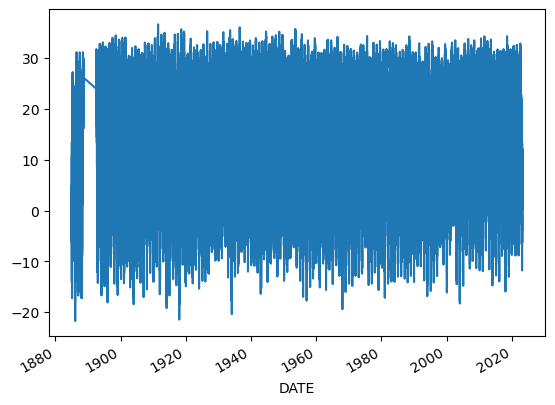

In [48]:
df_combined_max = pd.concat(lst_t_dfs_max,axis=1)
df_combined_mean_max = df_combined_max.mean(axis=1)
df_combined_mean_max.plot()

<AxesSubplot: xlabel='DATE'>

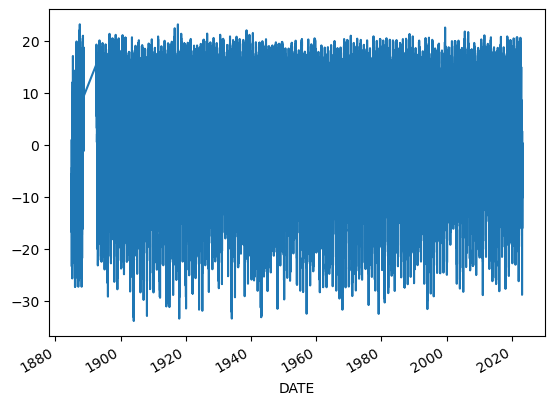

In [49]:
df_combined_min = pd.concat(lst_t_dfs_min,axis=1)
df_combined_mean_min = df_combined_min.mean(axis=1)
df_combined_mean_min.plot()

# For now take the mean

In [50]:
temp_mean_series = (df_combined_mean_max  +  df_combined_mean_min) /2
df_t = pd.DataFrame(data=temp_mean_series,columns=["T_MEAN"])
df_t.to_parquet(f'{data_folder}\\T\\combined_mean_T.parquet')